## Importing libraries required for data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Reading the files

In [2]:
full_menu=pd.read_csv('starbucks_drinkMenu_expanded.csv')
drink_menu=pd.read_csv('starbucks-menu-nutrition-drinks.csv')
food_menu=pd.read_csv('starbucks-menu-nutrition-food.csv', encoding="utf-16")

### Data preprocessing

In [3]:
full_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [5]:
food_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [6]:
print(full_menu.shape)
print(drink_menu.shape)
print(food_menu.shape)

(242, 18)
(177, 7)
(113, 6)


In [7]:
print('data types in full menu: ',full_menu.dtypes)
print('data types in drink menu: ',drink_menu.dtypes)
print('data ypes in food menu: ',food_menu.dtypes)

data types in full menu:  Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object
data types in drink menu:  Unnamed: 0    object
Calories      object
Fat (g)       object
Carb. (g)     object
Fiber (g)     object
Protein       object
Sodium        object
dtype: object
data ypes in food menu:  Unnamed: 0       object
 Calories         int64
 Fat (g)        float64
 Carb. (g

### converting the data types of column as per required

In [8]:
full_menu['Vitamin A (% DV) ']=full_menu['Vitamin A (% DV) '].str.replace('%','').astype(float)
full_menu['Vitamin C (% DV)']=full_menu['Vitamin C (% DV)'].str.replace('%','').astype(float)
full_menu[' Calcium (% DV) ']=full_menu[' Calcium (% DV) '].str.replace('%','').astype(float)
full_menu['Iron (% DV) ']=full_menu['Iron (% DV) '].str.replace('%','').astype(float)
full_menu.loc[237, ' Total Fat (g)'] = '3.2'
full_menu = full_menu.replace({'Caffeine (mg)': {'Varies': None, 'varies': None}})

In [9]:
full_menu[' Total Fat (g)']=full_menu[' Total Fat (g)'].apply(pd.to_numeric)
full_menu['Caffeine (mg)']=full_menu['Caffeine (mg)'].apply(pd.to_numeric)


In [10]:
full_menu.dtypes


Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

In [11]:
drink_menu.replace('-', '', regex=True, inplace=True)


In [12]:
drink_menu['Calories']=drink_menu['Calories'].apply(pd.to_numeric)
drink_menu['Fat (g)']=drink_menu['Fat (g)'].apply(pd.to_numeric)
drink_menu['Carb. (g)']=drink_menu['Carb. (g)'].apply(pd.to_numeric)
drink_menu['Fiber (g)']=drink_menu['Fiber (g)'].apply(pd.to_numeric)
drink_menu['Protein']=drink_menu['Protein'].apply(pd.to_numeric)
drink_menu['Sodium']=drink_menu['Sodium'].apply(pd.to_numeric)


In [13]:
drink_menu.dtypes

Unnamed: 0     object
Calories      float64
Fat (g)       float64
Carb. (g)     float64
Fiber (g)     float64
Protein       float64
Sodium        float64
dtype: object

In [14]:
print('null values for expanded menu: ',full_menu.isnull().sum())
print('null values for drinks menu: ',drink_menu.isnull().sum())
print('null values for food menu: ',food_menu.isnull().sum())
      

null values for expanded menu:  Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64
null values for drinks menu:  Unnamed: 0     0
Calories      85
Fat (g)       85
Carb. (g)     85
Fiber (g)     85
Protein       85
Sodium        85
dtype: int64
null values for food menu:  Unnamed: 0      0
 Calories       0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64


In [15]:
full_menu['Caffeine (mg)']=full_menu['Caffeine (mg)'].fillna(full_menu['Caffeine (mg)'].mean())
full_menu.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [16]:
drink_menu.dropna(inplace=True)
drink_menu.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [17]:
full_menu.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,89.520548
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,61.560774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,70.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,89.520548
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,130.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000


In [18]:
drink_menu.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


In [19]:
food_menu.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.353982,41.486726,2.849558,11.469027
std,127.710685,8.297397,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


## Exploratory Data Analysis

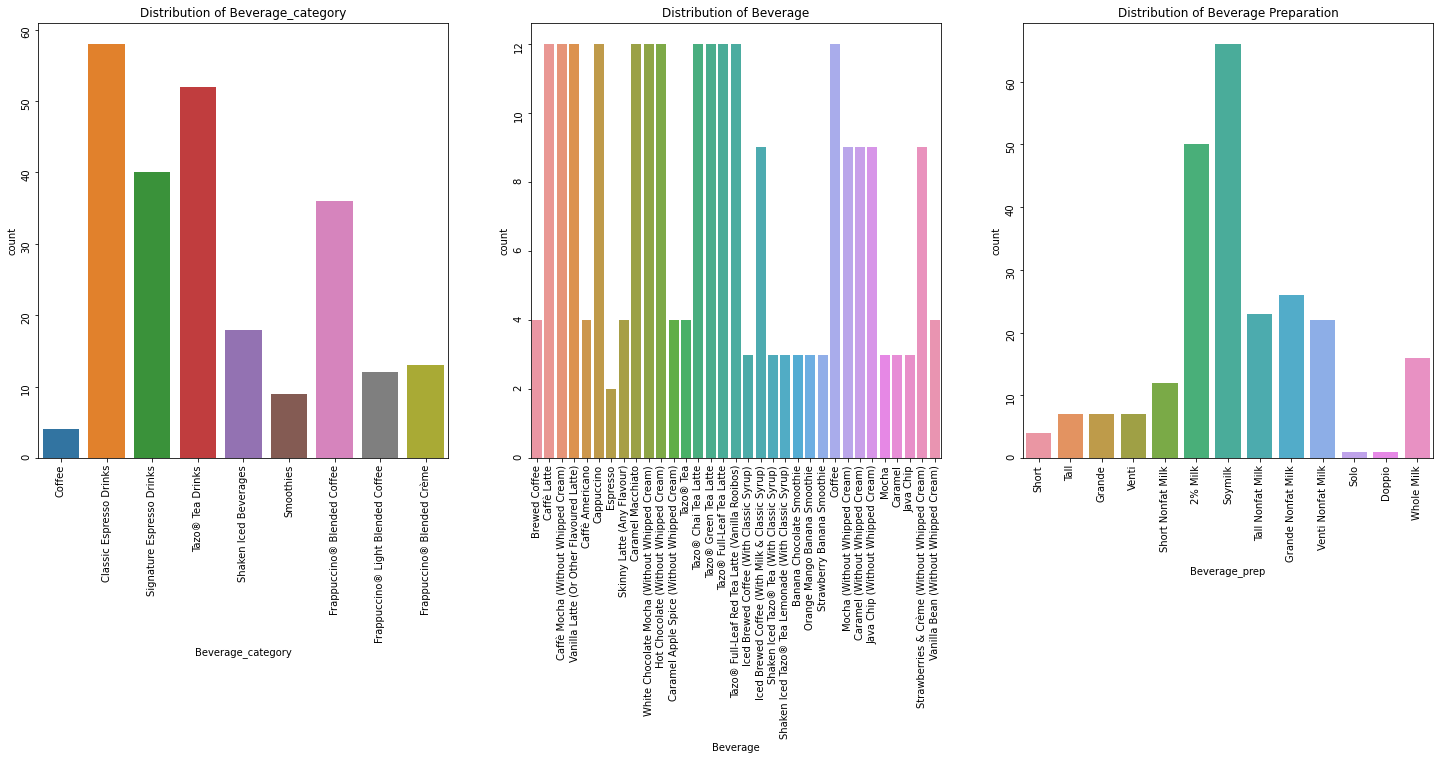

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))
sns.countplot(ax=axes[0],x='Beverage_category',data=full_menu)
axes[0].set_title('Distribution of Beverage_category')
sns.countplot(ax=axes[1],x='Beverage',data=full_menu)
axes[1].set_title('Distribution of Beverage')
sns.countplot(ax=axes[2],x='Beverage_prep',data=full_menu)
axes[2].set_title('Distribution of Beverage Preparation')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
plt.show()

**the above graphs represents** <br>
1. Distribution of beverage category <br>
2. Distribution of type of beverage <br>
3. Distribution of Preparation of beverage

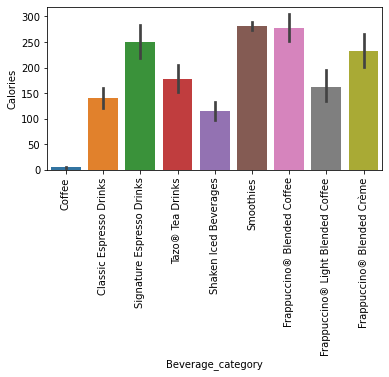

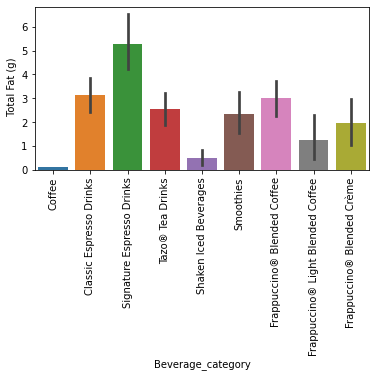

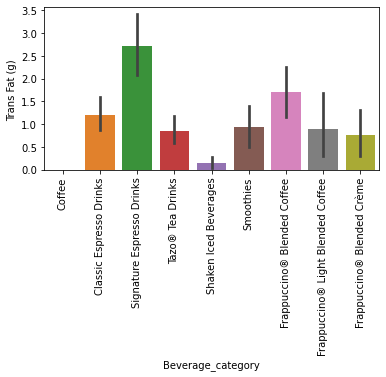

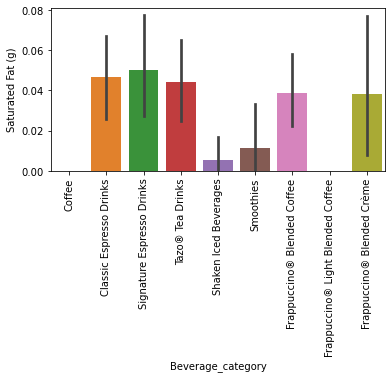

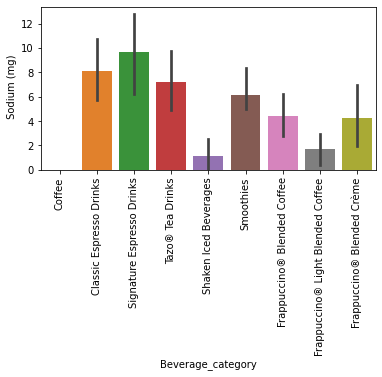

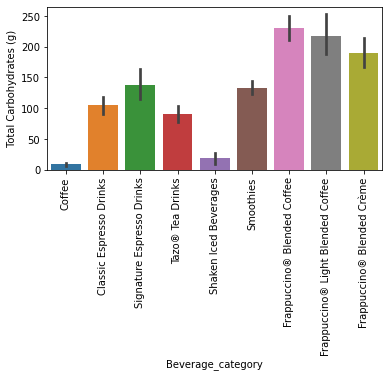

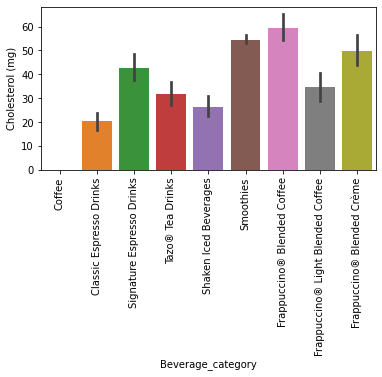

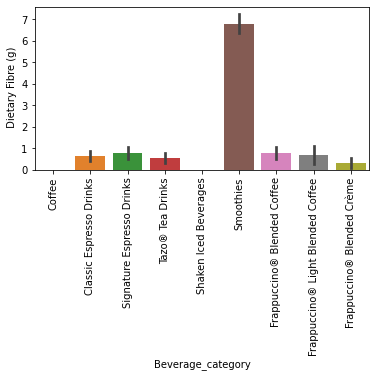

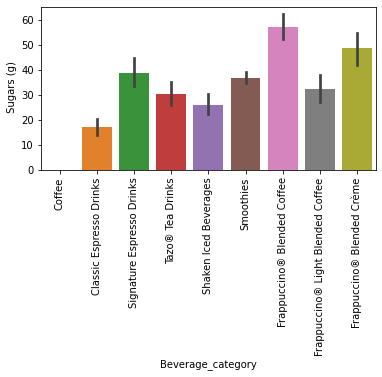

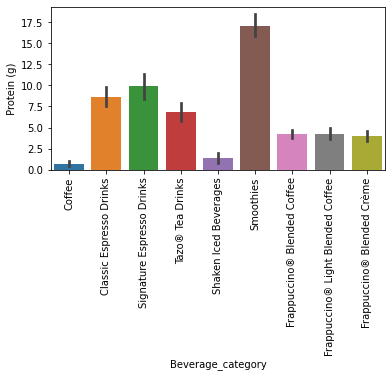

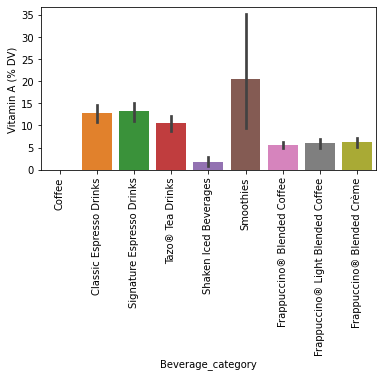

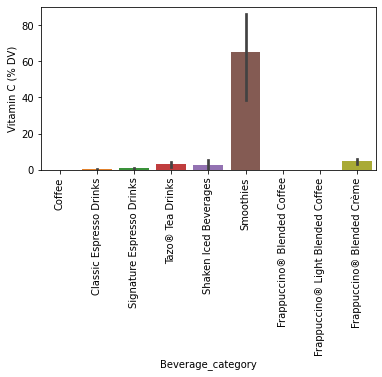

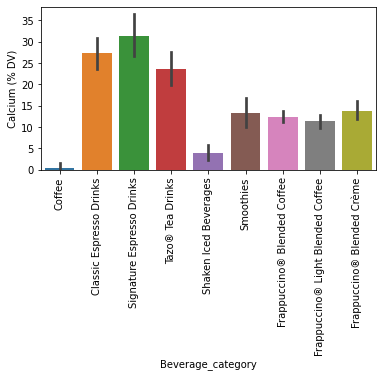

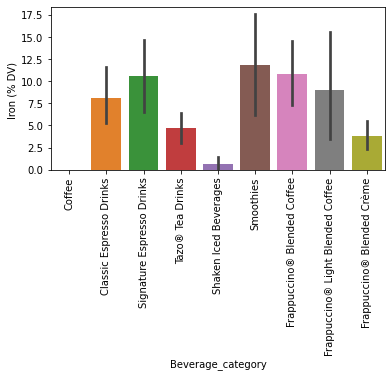

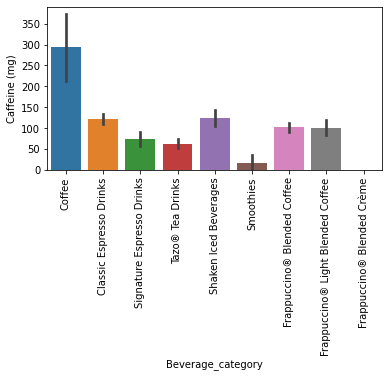

In [21]:
for col in full_menu.iloc[:, 3:].columns:
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data=full_menu, x='Beverage_category', y=col)
    plt.xticks(rotation=90)
    plt.show()

### The above graph represents the beverage category on the basis of their nutrition values

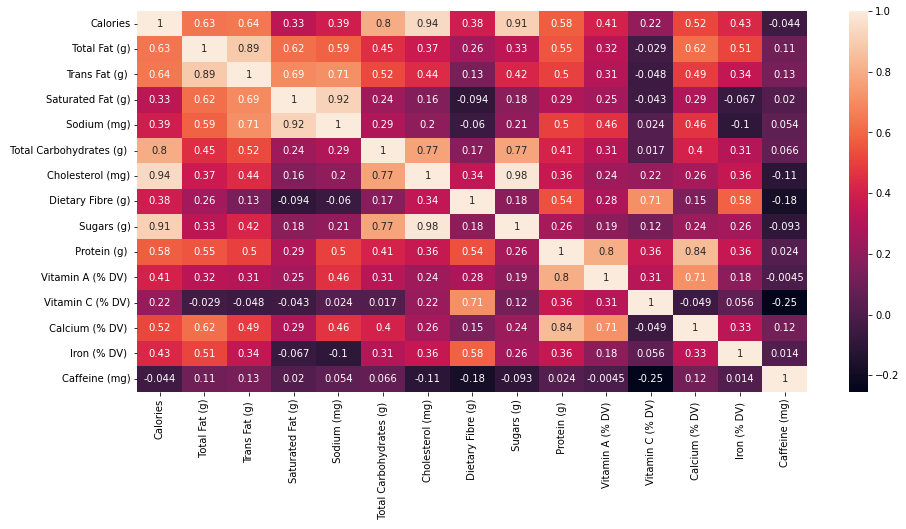

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(full_menu.corr(), annot=True)
plt.show()

## top 10 drinks in starbucks on the basis of their nutrition values

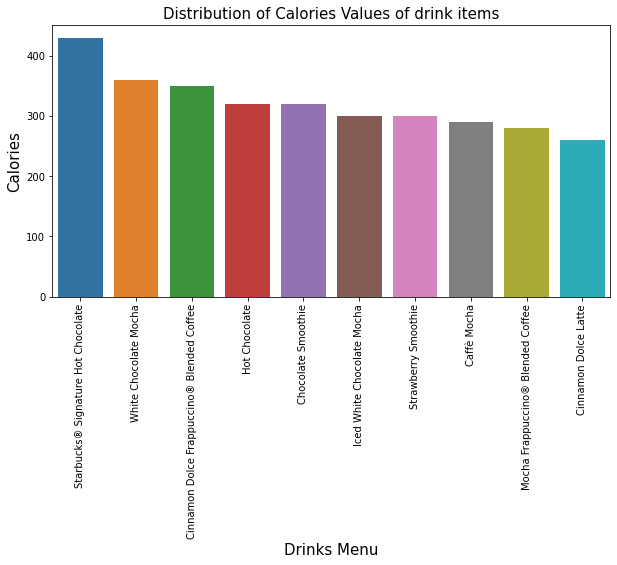

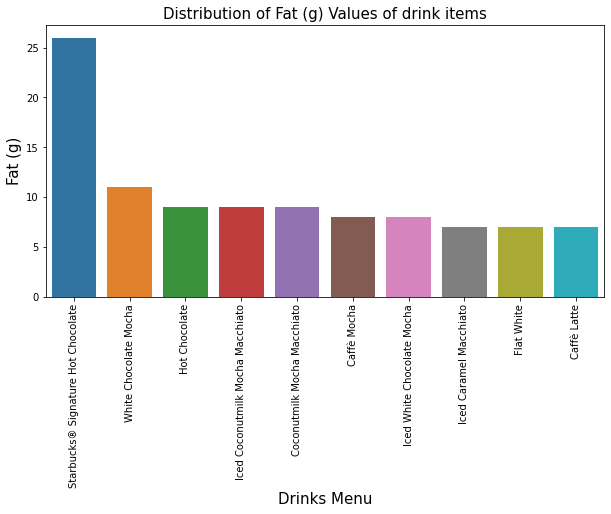

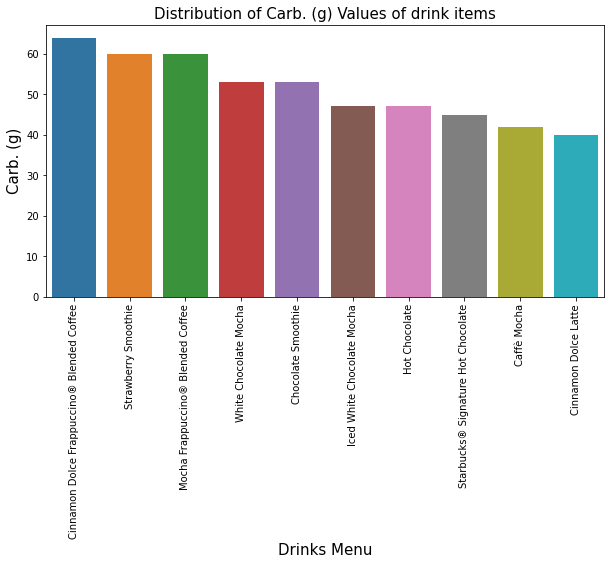

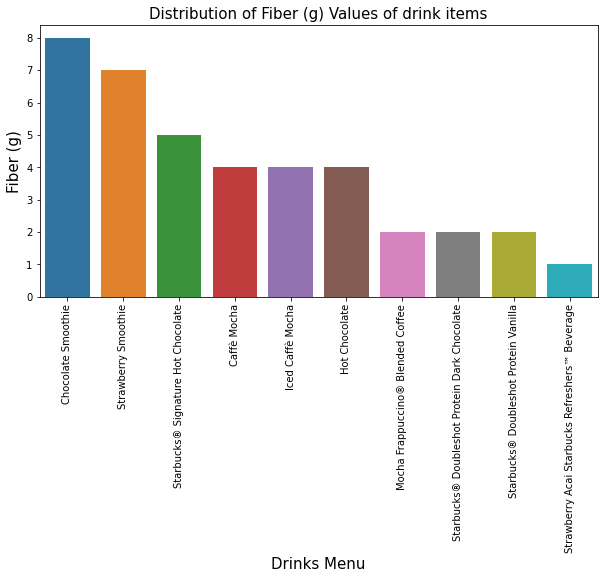

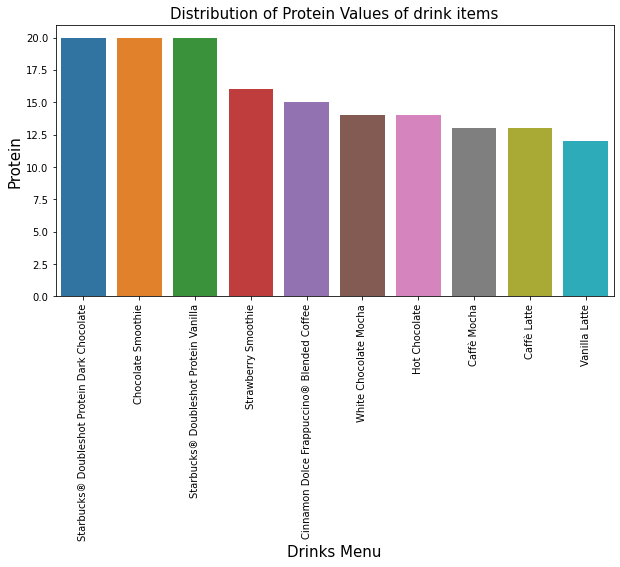

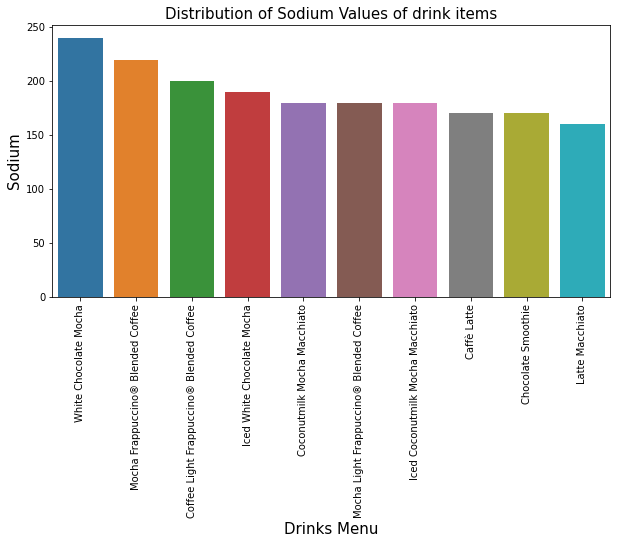

In [36]:
drink_menu.rename(columns = {'Unnamed: 0':'Drinks Menu'}, inplace = True)
for col in drink_menu.iloc[:,1:].columns:
    df=drink_menu.groupby('Drinks Menu',as_index=False)[col].max().sort_values(col,ascending=False).head(10)
    plt.figure(figsize=(10, 5)) 
    sns.barplot(data=df, x='Drinks Menu', y=col)
    plt.title('Distribution of '+str(col)+' Values of drink items',fontsize=15)
    plt.xticks(rotation=90)
    plt.xlabel('Drinks Menu',fontsize=15)
    plt.ylabel(col,fontsize=15)
    plt.show()
    print('\n','\n')

## Top 10 food menus in starbucks on the basis of their nutrition values

In [26]:
food_menu.rename(columns = {'Unnamed: 0':'Food Menu'}, inplace = True)

In [27]:
food_menu.columns=food_menu.columns.str.strip()

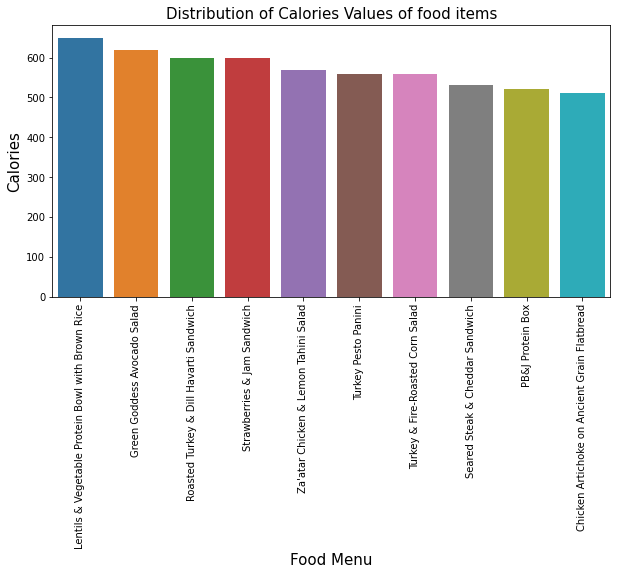

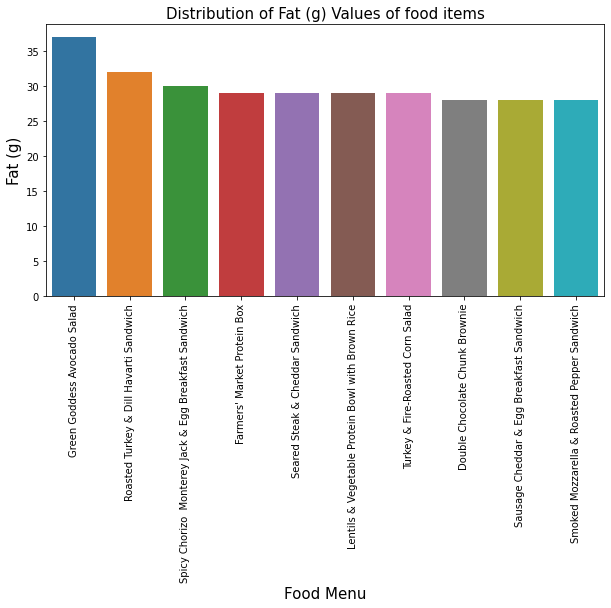

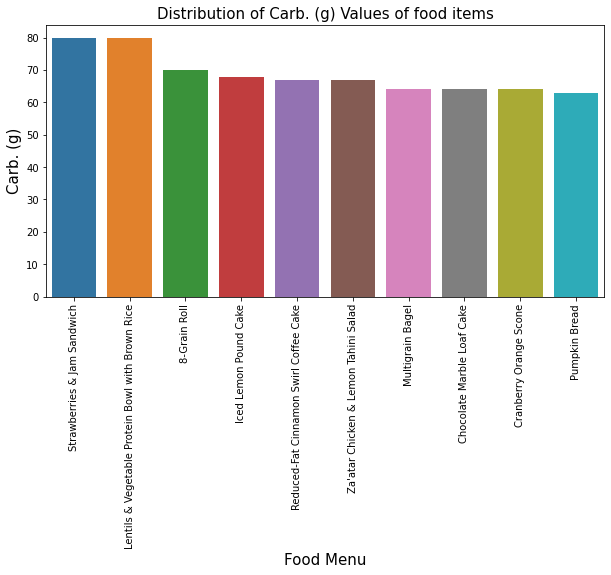

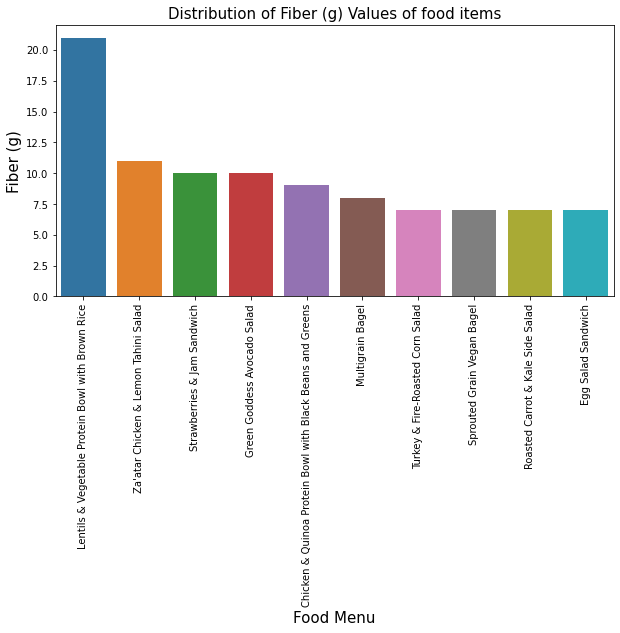

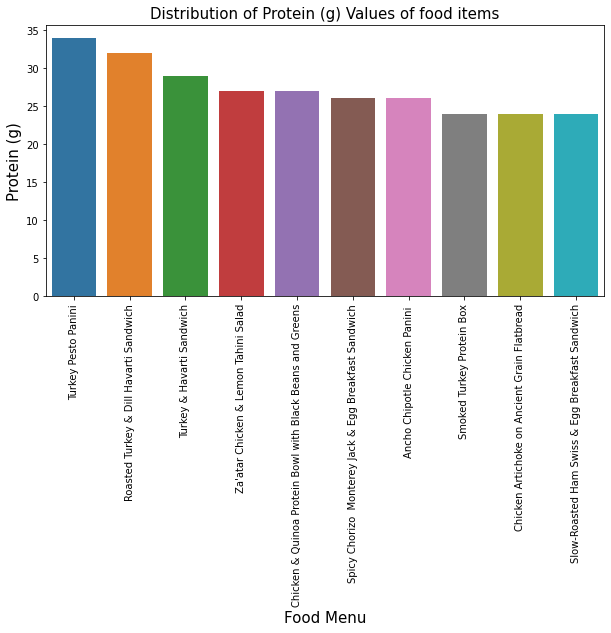

In [38]:
for col in food_menu.iloc[:,1:].columns:
    fm=food_menu.groupby('Food Menu',as_index=False)[col].max().sort_values(col,ascending=False).head(10)
    plt.figure(figsize=(10, 5)) 
    sns.barplot(data=fm, x='Food Menu', y=col)
    plt.title('Distribution of '+str(col)+' Values of food items',fontsize=15)
    plt.xticks(rotation=90)
    plt.xlabel('Food Menu',fontsize=15)
    plt.ylabel(col,fontsize=15)
    plt.show()
    print('\n','\n')
 

### From the above analysis we have seen the distribution of nutritious values across the different beverages and food categories